# week5

* 함수설정
* Selenium 모듈을 이용한 크롤링


In [ ]:
def test_def(a,b): # def(함수 선언), a,b를 입력 인자로 갖는 test_def 함수 선언
    return a+b # 인자를 입력하여 함수를 호출하면 a+b 결과 출력

In [4]:
test_def(10,5)

15

In [1]:
def test_args(a, *arg): # a는 첫번째 인자, *args는 나머지. 여러개 인자 삽입 가능
    print("첫번째 인자: ", a)
    for each in arg:
        print("*arg 다른 인자", each)

In [2]:
test_args('a','b','c','d')

첫번째 인자:  a
*arg 다른 인자 b
*arg 다른 인자 c
*arg 다른 인자 d


In [7]:
def test_kwargs(**kwargs): # ** key-word : value형태로 인자 출력
    print(kwargs)

In [8]:
test_kwargs(A='aa',B='bb', C='cc')

{'C': 'cc', 'B': 'bb', 'A': 'aa'}


In [9]:
def test_kwargs(**kwargs):
    A = kwargs.get('A', 1) # key-word 'A'에 대한 value가 없을 때, 1 입력
    print(A)

In [10]:
test_kwargs()

1


In [11]:
test_kwargs(A=10)

10


In [12]:
# 함수표현을 연습하기 위한 그래프 그리기
import matplotlib.pyplot as plt # 기본 그래프 matplotlib 모듈 호출, plt 문자로 호출 
import numpy as np #숫자를 다루는 numpy모듈 호출
%matplotlib inline

In [17]:
#sin그래프 그리기
# sin그래프 함수와 입력 인자들 선언
def plotSinwave(amp, freq, endTime, sampleTime, bias):
    """ 
    plot sine wave
    y = a sin(2 pi f t) + b
    """
# """ 함수 내용 """ 
    time = np.arange(0, endTime, sampleTime)
# time변수는 0~endTime까지, sampleTime 간격으로 생성
    result = amp*np.sin(2*np.pi*freq*time) + bias
# result변수는 sin함수 식   
    plt.figure(figsize =(12,6)) # 그래프 그리기, 보이는 크기는 '12,6'(가로세로비율)
    plt.plot(time, result); plt.grid(True) # x축 시간, y축 result로 하는 그래프, 눈금선
    plt.xlabel('time'); plt.ylabel('sin') # x, y축 제목
    plt.title(str(amp)+'*sin(2*pi*'+str(freq)+'*t)+'+str(bias)) # 그래프 제목
    plt.show() # 그래프 출력

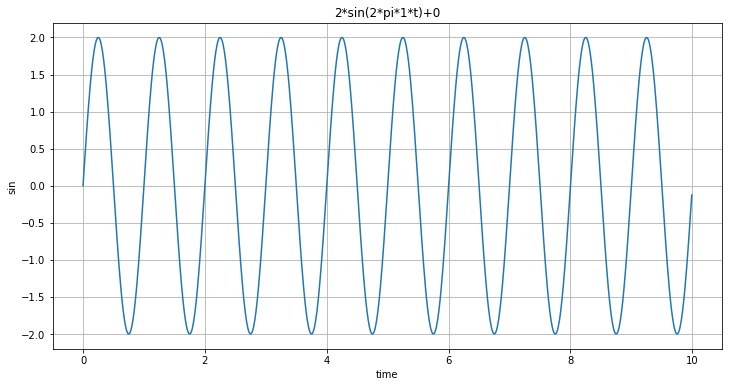

In [18]:
plotSinwave(2,1,10,0.01,0) # 입력된 인자에 따른 함수 결과 출력 

In [23]:
def plotSinwave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t) + b
    """
    
    endTime, sampleTime = kwargs.get('endTime',1), kwargs.get('sampleTime',0.01)
    amp, freq, bias = kwargs.get('amp',1), kwargs.get('freq',1), kwargs.get('bias',0)
    figsize = kwargs.get('figsize',(12,6))
    
    time = np.arange(0, endTime, sampleTime)
    result = amp*np.sin(2*np.pi*freq*time) + bias
    
        
    plt.figure(figsize =(12,6))
    plt.plot(time, result); plt.grid(True)
    plt.xlabel('time'); plt.ylabel('sin')
    plt.title(str(amp)+'*sin(2*pi*'+str(freq)+'*t)+'+str(bias))
    plt.show()

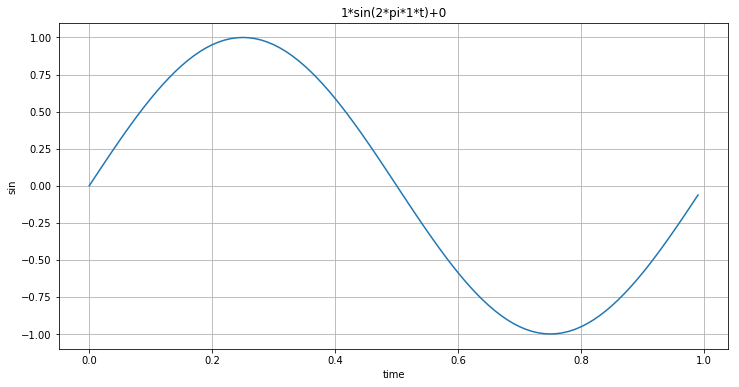

In [24]:
plotSinwave()

In [25]:
%pwd

'C:\\Users\\gusdu\\Documents\\FastCampus'

In [29]:
# Selenium 크롤링
from selenium import webdriver #모듈 불러오기
driver = webdriver.Chrome('../Fastcampus/driver/chromedriver') #웹 드라이버 경로 저장
driver.get('https://nid.naver.com/nidlogin.login') # 웹 드라이버를 이용하여 해당 url 화면 띄우기

In [30]:
elem_login = driver.find_element_by_id('id') # id 속성에 id속성값을 갖는 element 찾는 변수
elem_login.clear()                          # elem_login변수 id 입력창에 있는 내용 삭제
elem_login.send_keys('아이디 입력')
elem_login = driver.find_element_by_id('pw') # id 속성에 pw속성값을 갖는 element 찾는 변수
elem_login.clear()
elem_login.send_keys('비밀번호 입력')

In [31]:
xpath = """//*[@id="frmNIDLogin"]/fieldset/input""" # 로그인 버튼의 경로
driver.find_element_by_xpath(xpath).click() # 로그인 버턴을 클릭

In [32]:
driver.get("http://mail.naver.com") # 메일 페이지로 이동(get) 

In [33]:
from bs4 import BeautifulSoup 

html = driver.page_source # 현재 화면에 보이는 페이지 html내용을 html변수에 저장
soup = BeautifulSoup(html, 'lxml') # 불러온 페이지 소스를 lxml형태로 구조 변형

In [35]:
list_ = soup.find_all('div','name _ccr(lst.from) ') 
# soup변수 내용 중 div태그 class value값이 다음과 같은 element 모두 찾아 저장
list_

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|22794) _stopDefault" href="#" title='"이스타항공" &lt;newsletter@eastarjet.com&gt;'>이스타항공</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|22793) _stopDefault" href="#" title='"럭키위너" &lt;winner_1st@nate.com&gt;'>럭키위너</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|22792) _stopDefault" href="#" title='"현대Hmall" &lt;customer@hyundaihmall.com&gt;'>현대Hmall</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|22791) _stopDefault" href="#" title='"DBGuide" &lt;newsletter@dbguide.net&gt;'>DBGuide</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|2

In [37]:
list_n = [each.a.string for each in list_] 
# insex순서를 갖는 list형태의 list_를 하나씩 each에 반영하여 a태그의 문자열을 저장
list_n

['이스타항공',
 '럭키위너',
 '현대Hmall',
 'DBGuide',
 '중고나라',
 '증산정보도서관',
 '류지혁',
 '네이버페이',
 'KB국민은행',
 '증산정보도서관',
 'DBGuide',
 '네이버페이',
 '로또당첨예상번호',
 '럭키위너',
 'KB이사']

In [38]:
driver.close() # 브라우저 창 닫기

In [8]:
#서울 구별 주유정보 가져오기

from selenium import webdriver
driver = webdriver.Chrome('../Fastcampus/driver/chromedriver') # chromedriver 경로
driver.get("http://www.opinet.co.kr/searRgSelect.do") # url이동

In [9]:
sido_list_raw = driver.find_element_by_id('SIDO_NM0') 
# 웹페이지에서 id 속성의 value값이 'SIDO_NM0'인 element찾아 저장
sido_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="1fe8326e66c09525e8fdd9e4712eeabb", element="0.635233709175224-1")>

In [10]:
sido_list = sido_list_raw.find_element_by_tag_name("option")
# sido_list_raw 변수 중 option 태그 element 찾기
sido_list

<selenium.webdriver.remote.webelement.WebElement (session="1fe8326e66c09525e8fdd9e4712eeabb", element="0.635233709175224-2")>

In [11]:
# 각 시도 명칭은 id : SIDO_NM0 > option > attribute 속성값
# sido_list_raw 변수값 중 option태그를 모두 찾고 속성값을 저장
sido_name = [option.get_attribute("value") 
            for option in sido_list_raw.find_elements_by_tag_name("option")]
print(sido_name)
sido_name.remove('') # 첫번째 결과값에서 '' 내용 제거
sido_name

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']


['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [12]:
sido_list_raw.send_keys(sido_name[0]) # sido_name변수값 중 첫번째, '서울특별시' 입력 

In [13]:
gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0")
# id속성 값이 SIGUNGU_NM0인 elements 찾아 저장
gu_names = [option.get_attribute('value')
           for option in gu_list_raw.find_elements_by_tag_name("option")]
# 구 이름 가져오기
print(gu_names)
gu_names.remove("")
gu_names

['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [14]:
gu_list_raw.send_keys(gu_names[0]) # gu_name의 첫번쨰 값 입력

In [13]:
element_get_excel = driver.find_element_by_id('glopopd_excel').click()
# excel 첨부파일 클릭

In [19]:
#각 구별 첨부파일 가져오기
import time
for gu in gu_names:
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu) # gu_names 변수값 순서대로 입력
    time.sleep(2)
    
    element_get_excel = driver.find_element_by_id("glopopd_excel").click() # 첨부파일 클릭
    time.sleep(2)

In [20]:
driver.close()

In [15]:
import pandas as pd
from glob import glob # 파일이름을 특수문자로 다루도록 하는 모듈
glob('../Fastcampus/data/*.xls') # 다음과 같은 경로에 .xls파일 list형태로 출력

['../Fastcampus/data\\01_OctagonExcel_seoul.xls',
 '../Fastcampus/data\\지역_위치별(주유소) (1).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (10).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (11).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (12).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (13).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (14).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (15).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (16).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (17).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (18).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (19).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (2).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (20).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (21).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (22).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (23).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (24).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (3).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (4).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (5).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (6).xls',
 '../Fastca

In [16]:
station_files = glob('../Fastcampus/data/지역_*.xls') 
# glob 모듈에 해당하는 파일 list 형태로 저장
station_files

['../Fastcampus/data\\지역_위치별(주유소) (1).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (10).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (11).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (12).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (13).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (14).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (15).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (16).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (17).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (18).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (19).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (2).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (20).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (21).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (22).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (23).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (24).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (3).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (4).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (5).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (6).xls',
 '../Fastcampus/data\\지역_위치별(주유소) (7).xls',
 '../Fastcampus/d

In [17]:
pd.read_excel(station_files[0])

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1627,1425,-
3,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1898,1629,1439,1050
4,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1638,1448,1047
5,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1658,1458,1100
6,서울특별시,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),GS칼텍스,02-474-7222,N,1917,1658,1468,1100
7,서울특별시,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),SK에너지,02-487-2030,Y,1858,1658,1468,-
8,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1658,1468,990
9,서울특별시,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),SK에너지,02-3427-2043,Y,1854,1668,1468,-


In [18]:
pd.read_excel(station_files[0], header = 2) # list 첫번째 excel파일 불러와 내용의 상위 두줄 삭제

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1627,1425,-
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1898,1629,1439,1050
2,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1638,1448,1047
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1658,1458,1100
4,서울특별시,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),GS칼텍스,02-474-7222,N,1917,1658,1468,1100
5,서울특별시,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),SK에너지,02-487-2030,Y,1858,1658,1468,-
6,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1658,1468,990
7,서울특별시,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),SK에너지,02-3427-2043,Y,1854,1668,1468,-
8,서울특별시,알이디씨(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),현대오일뱅크,02-473-1556,N,-,1668,1468,-
9,서울특별시,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1668,1488,1000


In [21]:
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp) # 동일한 구조의 파일이라서 내용을 모두 한 list에 저장  
print(tmp_raw)
station_raw = pd.concat(tmp_raw) #concat : 각 list 내용을 하나의 파일로 변환

[       지역                   상호                          주소      상표  \
0   서울특별시               구천면주유소       서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
1   서울특별시       GS칼텍스㈜직영 신월주유소      서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
2   서울특별시     주)지유에너지직영 오렌지주유소    서울특별시 강동구  성안로 102 (성내동)   SK에너지   
3   서울특별시                광성주유소       서울 강동구 올림픽로 673 (천호동)   S-OIL   
4   서울특별시       대성석유(주)직영길동주유소      서울 강동구 천호대로 1168 (둔촌동)   GS칼텍스   
5   서울특별시              고속셀프주유소  서울특별시 강동구  천호대로 1246 (둔촌동)   SK에너지   
6   서울특별시              방아다리주유소        서울 강동구 동남로 811 (명일동)   SK에너지   
7   서울특별시   SK네트웍스㈜암사주유소(self)       서울 강동구 올림픽로 749 (암사동)   SK에너지   
8   서울특별시         알이디씨(주)천동주유소   서울특별시 강동구  천호대로 987 (천호동)  현대오일뱅크   
9   서울특별시             sk해뜨는주유소    서울특별시 강동구  상일로 132 (강일동)   SK에너지   
10  서울특별시      (주)퍼스트오일 코알라주유소   서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
11  서울특별시  (주)소모에너지엔테크놀러지성내주유소       서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
12  서울특별시       (주)삼표에너지 고덕주유소         서울 강동구 고덕로 39 (암사동)   GS칼텍스   
13  서울특별시       SK네

In [23]:
print(len(tmp_raw))
print(len(station_raw))

25
523


In [29]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 41
Data columns (total 10 columns):
지역       523 non-null object
상호       523 non-null object
주소       523 non-null object
상표       523 non-null object
전화번호     523 non-null object
셀프여부     523 non-null object
고급휘발유    523 non-null object
휘발유      523 non-null object
경유       523 non-null object
실내등유     523 non-null object
dtypes: object(10)
memory usage: 44.9+ KB


In [30]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1627,1425,-
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1898,1629,1439,1050
2,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1638,1448,1047
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1658,1458,1100
4,서울특별시,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),GS칼텍스,02-474-7222,N,1917,1658,1468,1100


In [32]:
# station_raw data 중 상호, 주소, 휘발유, 셀프여부, 상표 정보만 dataframe구성
stations = pd.DataFrame({'상호':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표'] })
stations.head()

,가격,상표,상호,셀프,주소
0,1627,현대오일뱅크,구천면주유소,N,서울 강동구 구천면로 357 (암사동)
1,1629,GS칼텍스,GS칼텍스㈜직영 신월주유소,N,서울 강동구 양재대로 1323 (성내동)
2,1638,SK에너지,주)지유에너지직영 오렌지주유소,N,서울특별시 강동구 성안로 102 (성내동)
3,1658,S-OIL,광성주유소,N,서울 강동구 올림픽로 673 (천호동)
4,1658,GS칼텍스,대성석유(주)직영길동주유소,N,서울 강동구 천호대로 1168 (둔촌동)


In [34]:
stations[stations['가격']=='-'] # 가격이 '-'으로 처리된 부분 찾기

,가격,상표,상호,셀프,주소
17,-,GS칼텍스,명진석유(주)동서울주유소,Y,서울특별시 강동구 천호대로 1456 (상일동)
13,-,SK에너지,서강주유소,N,서울 마포구 독막로 134 (창전동)
24,-,S-OIL,목동주유소,N,서울 양천구 목동중앙로 125 (목동)
25,-,S-OIL,현대주유소,Y,서울 양천구 남부순환로 372 (신월동)
33,-,S-OIL,하나주유소,N,서울특별시 영등포구 도림로 236 (신길동)
12,-,SK에너지,새한주유소,Y,서울특별시 강북구 도봉로 75 (미아동)
11,-,자가상표,세화주유소,N,서울특별시 중구 왕십리로 403 (신당동)
17,-,현대오일뱅크,유성주유소(self),Y,서울 중랑구 망우로 436 (망우동)
34,-,S-OIL,하이웨이주유소,N,서울 강서구 공항대로 432 (화곡동)
21,-,현대오일뱅크,현대오일뱅크(주)직영신구로주유소,N,서울특별시 구로구 가마산로 293 (구로동)


In [35]:
stations = stations[stations['가격'] != '-'] # stations변수에 가격이 '-' 부분 제외하고 저장
stations['가격'] = stations['가격'].astype('float') # 가격값은 float형태로 표현
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 41
Data columns (total 5 columns):
가격    512 non-null float64
상표    512 non-null object
상호    512 non-null object
셀프    512 non-null object
주소    512 non-null object
dtypes: float64(1), object(4)
memory usage: 24.0+ KB


In [37]:
# 주유정보 그래프로 그리기 
import seaborn as sns
import matplotlib.pyplot as plt
#한글 폰트 입력
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

f_path="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

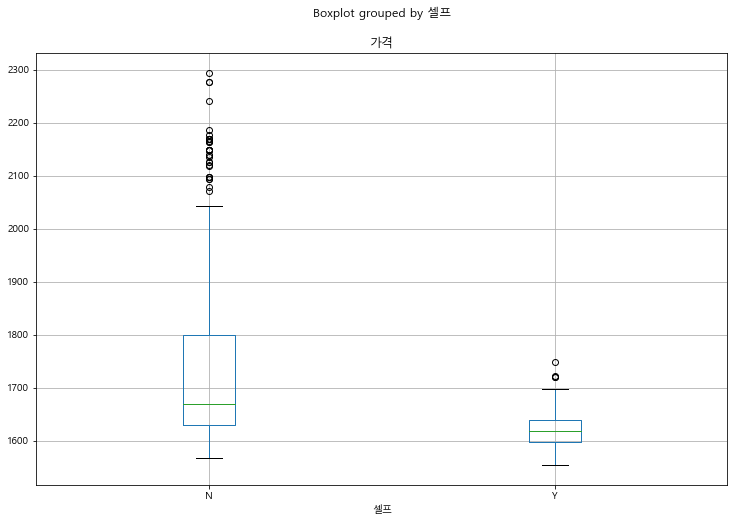

In [39]:
# 셀프주유 여부에 따른 가격 분포. matplotlib에서 제공하는 기본형 그래프
stations.boxplot(column = '가격', by = '셀프', figsize=(12,8));
#그룹 구분 'by'

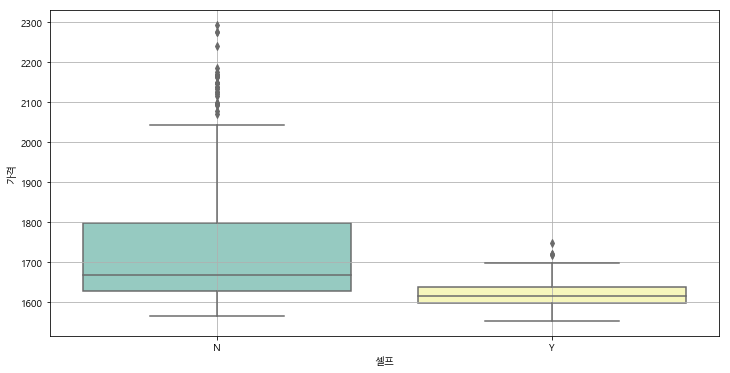

In [41]:
plt.figure(figsize=(12,6)) # size 12,6의 그래프 그리기
sns.boxplot(x='셀프', y='가격', data=stations, palette = 'Set3') 
# x축 셀프주유 여부, y축 가격 boxplot그리기. data는 stations
plt.grid() # 눈금선
plt.show()

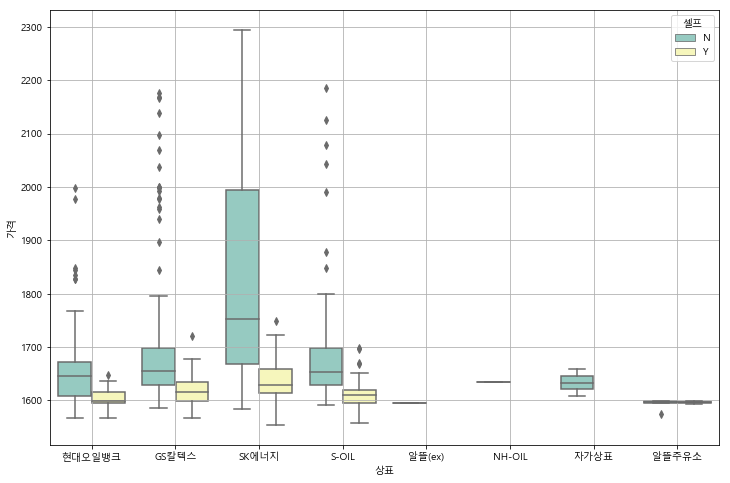

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette = 'Set3')
#각 상호별 셀프주유 여부에 따른 가격 비교 그래프, 그룹구분 "hue"
plt.grid()
plt.show()

In [48]:
# NAVER API이용하기
# NAVER 개발자센터 검색하여 사용자 ID/PW받고 open API이용 가능
import urllib.request
client_id = "--id--"
client_secret = "pw"
encText = urllib.parse.quote("파이썬") #한글을 url형식에 맞게 변경하는 코드
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # 네이버 블로그에서 '파이썬' 검색 url 작성

request = urllib.request.Request(url) # 입력 url에 대한 정보 요청
request.add_header("X-Naver-Client-Id",client_id) # 사용자 정보 보내기
request.add_header("X-Naver-Client-Secret",client_secret)


In [49]:
response = urllib.request.urlopen(request)
rescode = response.getcode() # 요청에 대한 결과가 올바른지 여부
if(rescode==200):            # 200이라면 올바른 결과 
    response_body = response.read() # 받은 결과 읽어와 저장
    print(response_body.decode('utf-8')) # 결과는 한글을 보기 위해 utf-8로 decode
else:
    print("Error Code:" + rescode) # error라면 오류 정보 출력

{
"lastBuildDate": "Sat, 18 Aug 2018 17:24:12 +0900",
"total": 78142,
"start": 1,
"display": 10,
"items": [
{
"title": "&quot;진정한 <b>파이썬</b> 고급 개발자가 되기 위한 능력을... ",
"link": "http://blog.naver.com/fastcampus?Redirect=Log&amp;logNo=221313946171",
"description": "<b>파이썬</b>은 백엔드 개발에서부터 데이터 분석에 이르기까지 광범위하게 사용되고 있는 간편하지만 강력한 언어입니다. <b>파이썬</b> 코어를 이해하면 더 깊이 있는 개발이 가능해지고 활용 범위도 확장됩니다. 여기... ",
"bloggername": "패스트캠퍼스 : FAST CAMPUS",
"bloggerlink": "http://blog.naver.com/fastcampus",
"postdate": "20180706"

},
{
"title": "<b>파이썬</b>독학 학습 후 달라진 후기",
"link": "http://blog.naver.com/vhcxjoi2746?Redirect=Log&amp;logNo=221326869715",
"description": "우연히 <b>파이썬</b>에 대한 이야기를 나눠보았습니다. 요즘은 코딩도 많이 배우고 저학년들도 쉽게 다가갈 수 있다는 장점을 알게 되었죠. 논리적 사고를 기르는데 아주 큰 기여도가 높은 <b>파이썬</b>! 프로그래밍 언어... ",
"bloggername": "GAINMIGA",
"bloggerlink": "http://blog.naver.com/vhcxjoi2746",
"postdate": "20180726"

},
{
"title": "부산 : C언어 / <b>파이썬</b> / 자바 / 프로그래밍 배울 수 있는곳은?",
"link": "http://blog.naver.com/minjeong86?Redirect=Log&amp;

In [50]:
# 책 정보에서 '파이썬' 검색
encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/book?query=" + encText

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()
print(response_body.decode('utf-8'))

{
"lastBuildDate": "Sat, 18 Aug 2018 17:24:12 +0900",
"total": 78142,
"start": 1,
"display": 10,
"items": [
{
"title": "&quot;진정한 <b>파이썬</b> 고급 개발자가 되기 위한 능력을... ",
"link": "http://blog.naver.com/fastcampus?Redirect=Log&amp;logNo=221313946171",
"description": "<b>파이썬</b>은 백엔드 개발에서부터 데이터 분석에 이르기까지 광범위하게 사용되고 있는 간편하지만 강력한 언어입니다. <b>파이썬</b> 코어를 이해하면 더 깊이 있는 개발이 가능해지고 활용 범위도 확장됩니다. 여기... ",
"bloggername": "패스트캠퍼스 : FAST CAMPUS",
"bloggerlink": "http://blog.naver.com/fastcampus",
"postdate": "20180706"

},
{
"title": "<b>파이썬</b>독학 학습 후 달라진 후기",
"link": "http://blog.naver.com/vhcxjoi2746?Redirect=Log&amp;logNo=221326869715",
"description": "우연히 <b>파이썬</b>에 대한 이야기를 나눠보았습니다. 요즘은 코딩도 많이 배우고 저학년들도 쉽게 다가갈 수 있다는 장점을 알게 되었죠. 논리적 사고를 기르는데 아주 큰 기여도가 높은 <b>파이썬</b>! 프로그래밍 언어... ",
"bloggername": "GAINMIGA",
"bloggerlink": "http://blog.naver.com/vhcxjoi2746",
"postdate": "20180726"

},
{
"title": "부산 : C언어 / <b>파이썬</b> / 자바 / 프로그래밍 배울 수 있는곳은?",
"link": "http://blog.naver.com/minjeong86?Redirect=Log&amp;

In [53]:
#영화 정보에서 '파이썬'검색
encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/movie?query=" + encText

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()
print(response.read().decode('utf-8'))

{
"lastBuildDate": "Sat, 18 Aug 2018 17:28:03 +0900",
"total": 1,
"start": 1,
"display": 1,
"items": [
{
"title": "<b>파이썬</b> 앤 가드",
"link": "https://movie.naver.com/movie/bi/mi/basic.nhn?code=152070",
"image": "https://ssl.pstatic.net/imgmovie/mdi/mit110/1520/152070_P01_145336.jpg",
"subtitle": "PYTHON AND GUARD",
"pubDate": "2015",
"director": "안톤 디아코프|",
"actor": "",
"userRating": "0.00"

}
]
}



In [54]:
#쇼핑에서 '축구화'검색
encText = urllib.parse.quote("축구화")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()
print(response.read().decode('utf-8'))

{
"lastBuildDate": "Sat, 18 Aug 2018 17:28:13 +0900",
"total": 576012,
"start": 1,
"display": 10,
"items": [
{
"title": "나이키 팬텀 비전 프로 DF HG <b>축구화</b> AQ9289 001",
"link": "http://search.shopping.naver.com/gate.nhn?id=14991364602",
"image": "https://shopping-phinf.pstatic.net/main_1499136/14991364602.20180807160004.jpg",
"lprice": "133130",
"hprice": "269000",
"mallName": "네이버",
"productId": "14991364602",
"productType": "1"

},
{
"title": "나이키 팬텀 비전 프로 DF FG <b>축구화</b> AO3266 060",
"link": "http://search.shopping.naver.com/gate.nhn?id=14991379670",
"image": "https://shopping-phinf.pstatic.net/main_1499137/14991379670.20180807160448.jpg",
"lprice": "119510",
"hprice": "179000",
"mallName": "네이버",
"productId": "14991379670",
"productType": "1"

},
{
"title": "나이키 티엠포 레전드 7 엘리트 FG <b>축구화</b> AH7238 006",
"link": "http://search.shopping.naver.com/gate.nhn?id=14999713587",
"image": "https://shopping-phinf.pstatic.net/main_1499971/14999713587.20180808163214.jpg",
"lprice": "187120",
"hprice

In [88]:
# API를 이용하는 함수 구성
import datetime
def get_request_url(API_url):           # API_url을 인자로 하는 get_request_url함수 선언 . 
    client_id = "kUMekrHWTsTF09Meg3Sj"
    client_secret = "DYchAGoQGY"
    
    request = urllib.request.Request(API_url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)
    if response.getcode()==200:
        print("[%s] Url Request Success" %datetime.datetime.now()) #현재 날짜 정보 [ ] 안에 입력
        return response.read().decode('utf-8')                     #불러온 내용을 utf-8로 decode한 결과 반출
    else:
        print("[%s] Error --------------" %datetime.datetime.now())
        return None

In [89]:
encText = urllib.parse.quote('몰스킨') # 검색어
API_url = "https://openapi.naver.com/v1/search/shop.json?query=" + encText #함수 인자
print(get_request_url(API_url)) # 함수 호출하여 결과 출력

[2018-08-18 17:57:43.660195] Url Request Success
{
"lastBuildDate": "Sat, 18 Aug 2018 17:57:41 +0900",
"total": 22495,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>몰스킨</b> 클래식 룰드 줄지",
"link": "http://search.shopping.naver.com/gate.nhn?id=7398991731",
"image": "https://shopping-phinf.pstatic.net/main_7398991/7398991731.20180112135400.jpg",
"lprice": "15700",
"hprice": "40530",
"mallName": "네이버",
"productId": "7398991731",
"productType": "1"

},
{
"title": "<b>몰스킨</b> 까이에 엑스라지 다이어리",
"link": "http://search.shopping.naver.com/gate.nhn?id=10010203158",
"image": "https://shopping-phinf.pstatic.net/main_1001020/10010203158.20160704125951.jpg",
"lprice": "8800",
"hprice": "34100",
"mallName": "네이버",
"productId": "10010203158",
"productType": "1"

},
{
"title": "KM <b>몰스킨</b> 클래식 룰드 줄지 소프트커버 라지 노트북 9788",
"link": "http://search.shopping.naver.com/gate.nhn?id=13372539964",
"image": "https://shopping-phinf.pstatic.net/main_1337253/13372539964.1.jpg",
"lprice": "19400",
"hprice": "0",
"ma

In [90]:
# 함수와 함수인자 이용
def get_search_result(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search/"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    url = base + node + param_query + param_start+ param_disp
    
    print(url)

In [91]:
get_search_result('shop', 'TEST', 10, 3) 
# 쇼핑 사이트에서 TEST를 검색어로 하여 10번째 쇼핑 정보부터 3개만 보여줄 것.

https://openapi.naver.com/v1/search//shop.json?query=TEST&start=10&display=3


In [92]:
import json
def get_search_result(api_node, search_text, start_num, disp_num):
    
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    url = base + node + param_query + param_start + param_disp
    
    # 요청이 올바르게 왔는지 확인하는 과정
    getting_data = get_request_url(url) 
    
    if (getting_data == None):
        return None
    else:
        return json.loads(getting_data)

In [93]:
search_result = get_search_result('shop', '몰스킨', 1, 2)
# naver쇼핑에서 몰스킨을 검색어로 하고 첫번째 정보부터 2개만 불러오기

[2018-08-18 17:58:19.924901] Url Request Success


In [94]:
search_result # 검색결과

{'display': 2,
 'items': [{'hprice': '40530',
   'image': 'https://shopping-phinf.pstatic.net/main_7398991/7398991731.20180112135400.jpg',
   'link': 'http://search.shopping.naver.com/gate.nhn?id=7398991731',
   'lprice': '15700',
   'mallName': '네이버',
   'productId': '7398991731',
   'productType': '1',
   'title': '<b>몰스킨</b> 클래식 룰드 줄지'},
  {'hprice': '34100',
   'image': 'https://shopping-phinf.pstatic.net/main_1001020/10010203158.20160704125951.jpg',
   'link': 'http://search.shopping.naver.com/gate.nhn?id=10010203158',
   'lprice': '8800',
   'mallName': '네이버',
   'productId': '10010203158',
   'productType': '1',
   'title': '<b>몰스킨</b> 까이에 엑스라지 다이어리'}],
 'lastBuildDate': 'Sat, 18 Aug 2018 17:58:18 +0900',
 'start': 1,
 'total': 22495}